In [1]:
import os
import pandas as pd
import numpy as np
import cv2

def CheckDir(dirname):
	if not os.path.exists(dirname):
		os.makedirs(dirname)

DATA_DIR="Data/PP_pins"
IM_SIZE=(299,299)

In [4]:
FEATURE_DIR="Data/features/"
features=np.load(FEATURE_DIR+"Inceptionv3_avg_RGB.npy")
pins=pd.read_pickle("Data/pins_RGB.pkl")
pins.head()

,Path,Images
0,Data/PP_pins/000337a0ee7432d5453c7016a757d410.jpg,"[[[255, 255, 255], [255, 255, 255], [255, 255,..."
1,Data/PP_pins/00201308aafb382364df742cd2c88367.jpg,"[[[94, 55, 84], [118, 80, 119], [100, 63, 115]..."
2,Data/PP_pins/00264f7f0e84a86fddd2dc390941c044.jpg,"[[[228, 237, 216], [228, 238, 214], [225, 233,..."
3,Data/PP_pins/0027d4a15fbca7694c80a3a96383292c.jpg,"[[[14, 63, 77], [15, 64, 78], [15, 64, 78], [1..."
4,Data/PP_pins/0028f6bcf10b0b32b8e5774fc21cc305.jpg,"[[[187, 188, 182], [188, 191, 184], [187, 189,..."


In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans=KMeans(n_clusters=6, init="k-means++", max_iter=300, n_init=10, random_state=1)
labels=kmeans.fit_predict(features)


In [6]:
pins['Cluster']=labels
pins.head()

,Path,Images,Cluster
0,Data/PP_pins/000337a0ee7432d5453c7016a757d410.jpg,"[[[255, 255, 255], [255, 255, 255], [255, 255,...",0
1,Data/PP_pins/00201308aafb382364df742cd2c88367.jpg,"[[[94, 55, 84], [118, 80, 119], [100, 63, 115]...",1
2,Data/PP_pins/00264f7f0e84a86fddd2dc390941c044.jpg,"[[[228, 237, 216], [228, 238, 214], [225, 233,...",0
3,Data/PP_pins/0027d4a15fbca7694c80a3a96383292c.jpg,"[[[14, 63, 77], [15, 64, 78], [15, 64, 78], [1...",4
4,Data/PP_pins/0028f6bcf10b0b32b8e5774fc21cc305.jpg,"[[[187, 188, 182], [188, 191, 184], [187, 189,...",4


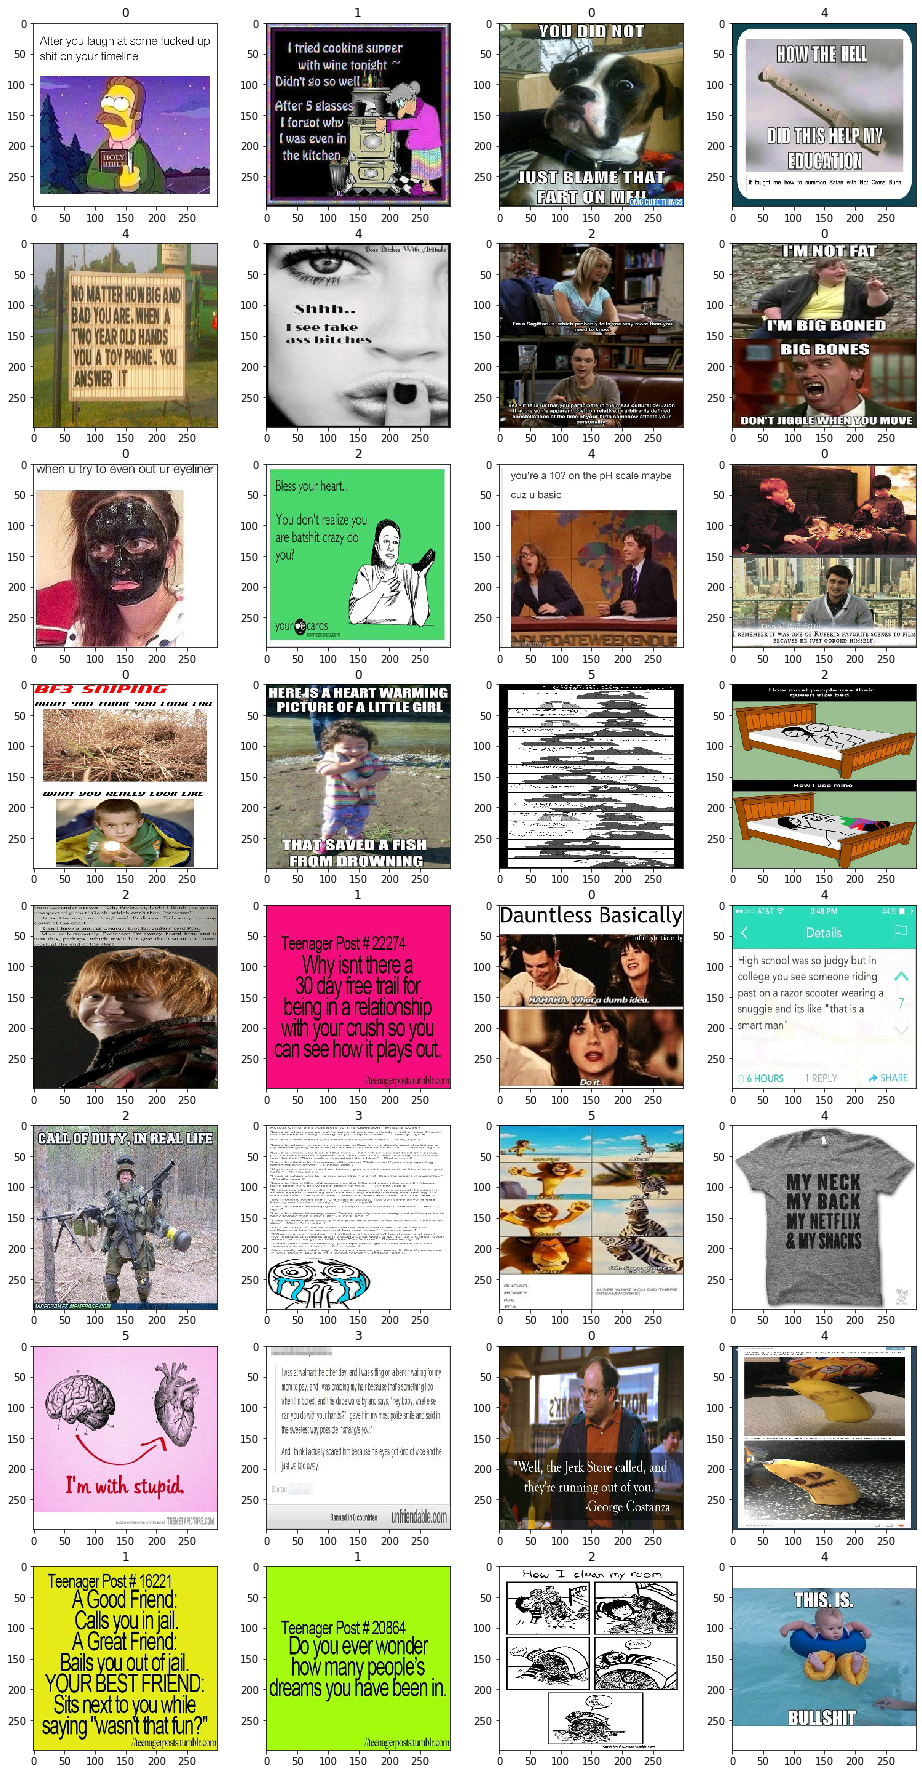

In [14]:
fig=plt.figure(figsize=(16,48))
img_index=1

for i in range(32):
	fig.add_subplot(12,4,img_index)
	plt.imshow(pins['Images'][i])
	plt.title(pins['Cluster'][i])
	img_index+=1
plt.show()